# 1

In [33]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec


In [267]:
def basic_linear_transform(img, alpha, beta):
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

image = cv2.imread('../images/Chapter 01/Figure 1.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pil_image=Image.fromarray(image)

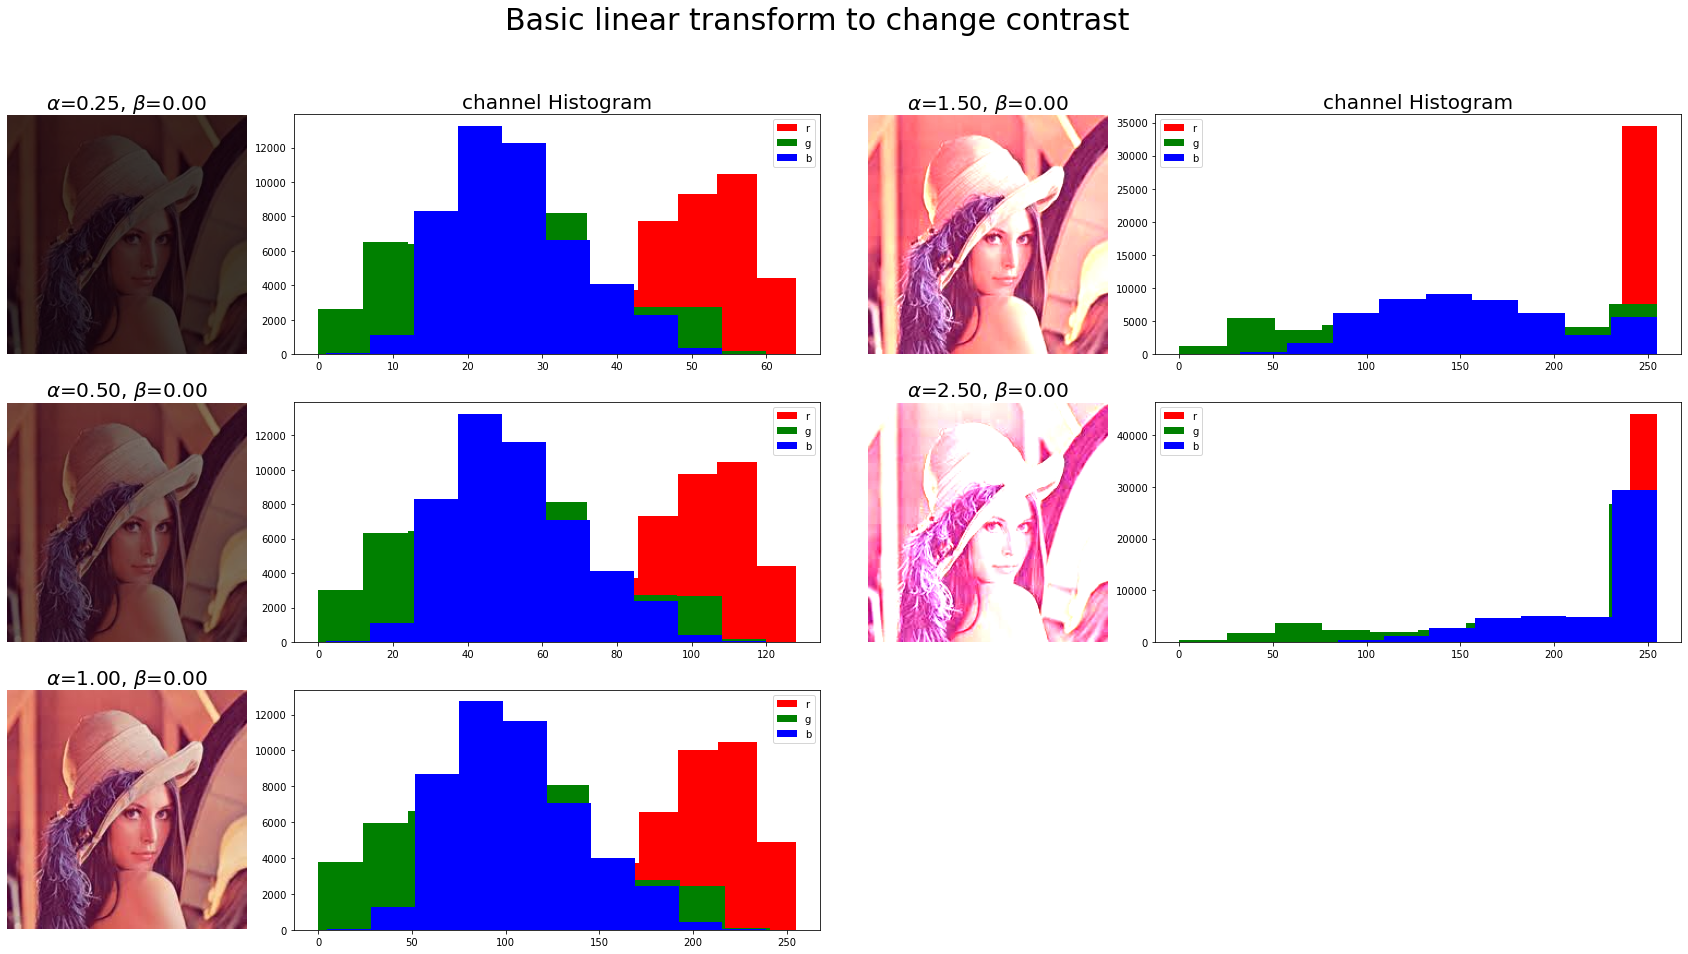

In [268]:
fig = plt.figure()            # Define "figure" instance
fig.set_size_inches(30,15)      # Physical page size in inches, (lx,ly)
suptit = "Basic linear transform to change contrast"
fig.suptitle(suptit,fontsize=30)   # Title for the page


gs0 = GridSpec(3,6)    # (ny,nx)

ax1 = plt.subplot(gs0[0,0:1])  # gs0[y0(top):y1(bottom),x0(left):x1(right)]
alpha, beta = 0.25, 0
image_025 = basic_linear_transform(image, alpha, beta)
ax1.imshow(image_025)
ax1.set_title(r'$\alpha$={:.2f}, $\beta$={:.2f}'.format(alpha, beta), size=20)
ax1.axis('off')

ax2 = plt.subplot(gs0[0,1:3])
pil_image_025=Image.fromarray(image_025)
r, g, b = pil_image_025.split() # split the channels into red, green and blue
ax2.hist(np.array(r).ravel(), stacked=True, color='r', label='r')
ax2.hist(np.array(g).ravel(), stacked=True, color='g', label='g')
ax2.hist(np.array(b).ravel(), stacked=True, color='b', label='b')
ax2.legend()
ax2.set_title("channel Histogram",fontsize=20)

ax3 = plt.subplot(gs0[0,3:4])  
alpha, beta = 1.50, 0
image_150 = basic_linear_transform(image, alpha, beta)
ax3.imshow(image_150)
ax3.set_title(r'$\alpha$={:.2f}, $\beta$={:.2f}'.format(alpha, beta), size=20)
ax3.axis('off')

ax4 = plt.subplot(gs0[0,4:8])  
pil_image_150=Image.fromarray(image_150)
r, g, b = pil_image_150.split() # split the channels into red, green and blue
ax4.hist(np.array(r).ravel(), stacked=True, color='r', label='r')
ax4.hist(np.array(g).ravel(), stacked=True, color='g', label='g')
ax4.hist(np.array(b).ravel(), stacked=True, color='b', label='b')
ax4.legend()
ax4.set_title("channel Histogram",fontsize=20)
##
ax5 = plt.subplot(gs0[1,0:1]) 
alpha, beta = 0.50, 0
image_05 = basic_linear_transform(image, alpha, beta)
ax5.imshow(image_05)
ax5.set_title(r'$\alpha$={:.2f}, $\beta$={:.2f}'.format(alpha, beta), size=20)
ax5.axis('off')

ax6 = plt.subplot(gs0[1,1:3])
pil_image_05=Image.fromarray(image_05)
r, g, b = pil_image_05.split() # split the channels into red, green and blue
ax6.hist(np.array(r).ravel(), stacked=True, color='r', label='r')
ax6.hist(np.array(g).ravel(), stacked=True, color='g', label='g')
ax6.hist(np.array(b).ravel(), stacked=True, color='b', label='b')
ax6.legend()

ax7 = plt.subplot(gs0[1,3:4]) 
alpha, beta = 2.5, 0
image_250 = basic_linear_transform(image, alpha, beta)
ax7.imshow(image_250)
ax7.set_title(r'$\alpha$={:.2f}, $\beta$={:.2f}'.format(alpha, beta), size=20)
ax7.axis('off')

ax8 = plt.subplot(gs0[1,4:8]) 
pil_image_250=Image.fromarray(image_250)
r, g, b = pil_image_250.split() # split the channels into red, green and blue
ax8.hist(np.array(r).ravel(), stacked=True, color='r', label='r')
ax8.hist(np.array(g).ravel(), stacked=True, color='g', label='g')
ax8.hist(np.array(b).ravel(), stacked=True, color='b', label='b')
ax8.legend()

##
ax9 = plt.subplot(gs0[2,0:1])  
alpha, beta = 1.0, 0
image_100 = basic_linear_transform(image, alpha, beta)
ax9.imshow(image)
ax9.set_title(r'$\alpha$={:.2f}, $\beta$={:.2f}'.format(alpha, beta), size=20)
ax9.axis('off')

ax10 = plt.subplot(gs0[2,1:3])   
pil_image_100=Image.fromarray(image_100)
r, g, b = pil_image_100.split() # split the channels into red, green and blue
ax10.hist(np.array(r).ravel(), stacked=True, color='r', label='r')
ax10.hist(np.array(g).ravel(), stacked=True, color='g', label='g')
ax10.hist(np.array(b).ravel(), stacked=True, color='b', label='b')
ax10.legend()

plt.show()   #- If want to see on screen -#


# 2

In [25]:
import cv2
from PIL import Image, ImageChops
import numpy as np
import matplotlib.pylab as plt

In [264]:
image_background = cv2.imread('../images/Chapter 01/Figure 8.jpg') 
image_background = cv2.cvtColor(image_background, cv2.COLOR_BGR2RGB)
image_background_PIL =Image.fromarray(image_background)
rows_bg, cols_bg, _ = image_background.shape

image_horse = cv2.imread('../images/Chapter 01/Figure 18.png') 
image_horse = cv2.cvtColor(image_horse, cv2.COLOR_BGR2RGB)
image_horse_PIL =Image.fromarray(image_horse)
rows_hs, cols_hs, _ = image_horse.shape

fx = cols_bg / cols_hs
fy = rows_bg / rows_hs

image_background.shape, image_horse.shape, fx, fy


((576, 768, 3), (680, 492, 3), 1.5609756097560976, 0.8470588235294118)

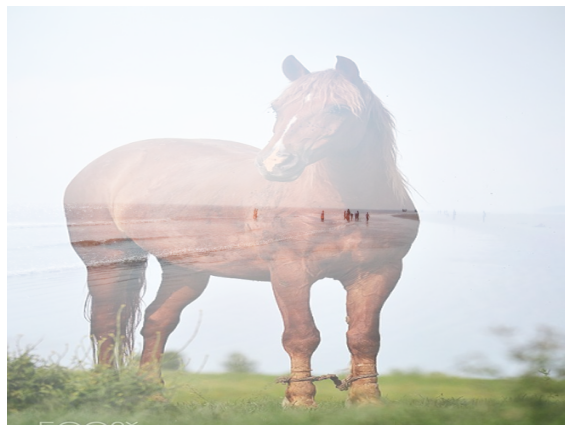

In [265]:
image_horse_resize = cv2.resize(image_horse, None, \
    fx=fx, fy=fy, interpolation=cv2.INTER_CUBIC)
image_horse_resize_PIL =Image.fromarray(image_horse_resize)

image_screen = ImageChops.screen(image_background_PIL, image_horse_resize_PIL)

plt.figure(figsize=(10,10))
plt.imshow(image_screen)
plt.axis('off')
plt.show()

# 3

In [246]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pylab as plt
from skimage.color import rgb2gray, gray2rgb

In [253]:
image_background = cv2.imread('../images/Chapter 01/Figure 24.png').astype(np.uint8)
image_background = cv2.cvtColor(image_background, cv2.COLOR_BGR2RGB)
image_background_PIL = Image.open('../images/Chapter 01/Figure 24.png').convert("RGBA")
rows_bg, cols_bg, _ = image_background.shape

image_lion = cv2.imread('../images/Chapter 01/Figure 25.png').astype(np.uint8)
image_lion = cv2.cvtColor(image_lion, cv2.COLOR_BGR2RGB)
image_lion_PIL = Image.open('../images/Chapter 01/Figure 25.png').convert("RGBA")
rows_hs, cols_hs, _ = image_horse.shape
image_background_PIL.size


(768, 480)

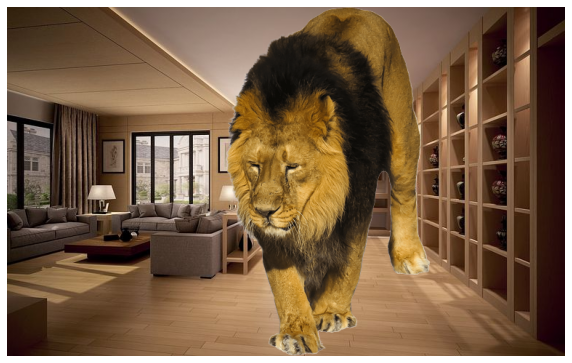

In [229]:
#### 삽질의 흔적...
# rows, cols, _ = image_lion.shape
# roi = image_background[0:rows, 300:cols+300]

# img2gray = (255*rgb2gray(image_lion)).astype(np.uint8)
# mask = 255*(img2gray < 7) #cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)

# mask_inv = np.invert(mask) #cv2.bitwise_not(mask)
# mask_inv = mask_inv.astype(np.uint8)

# image_background_bg = np.bitwise_and(roi, gray2rgb(mask)) #cv2.bitwise_and(roi,roi,mask = mask_inv)
# image_lion_fg = np.bitwise_and(image_lion, gray2rgb(mask_inv)) # cv2.bitwise_and(img2,img2,mask = mask)
# image_lion_fg = Image.fromarray((image_lion_fg * 255).astype(np.uint8))

# image_lion_PIL_fg=Image.fromarray(image_lion_fg)
# dst = image_background_bg + image_lion_fg
# image_background[0:rows, 300:cols+300 ] = dst
# image_lion_PIL = image_lion_PIL.convert("RGBA")

image_background_PIL.paste(image_lion_PIL, (300, 0), image_lion_PIL)

plt.figure(figsize=(10,10))
plt.imshow(image_background_PIL)
plt.axis('off')
plt.show()

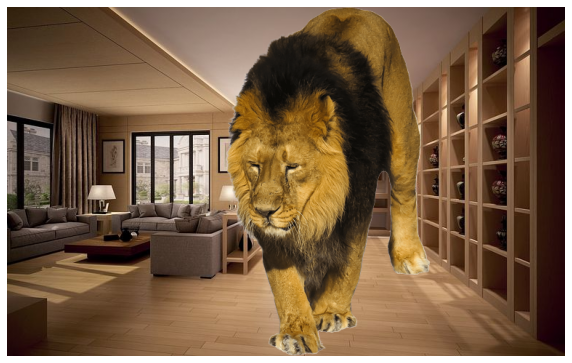

In [ ]:
image_background_PIL.paste\
    (image_lion_PIL, (300, 0), image_lion_PIL)

plt.figure(figsize=(10,10))
plt.imshow(image_background_PIL)
plt.axis('off')
plt.show()

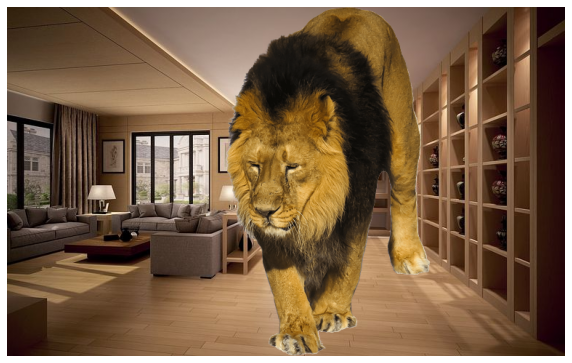

In [249]:
img = Image.new('RGBA', (768, 480), (0, 0, 0, 0))
img.paste(image_lion_PIL, (300, 0))

img3 = Image.alpha_composite(image_background_PIL, img)

plt.figure(figsize=(10,10))
plt.imshow(img3)
plt.axis('off')
plt.show()

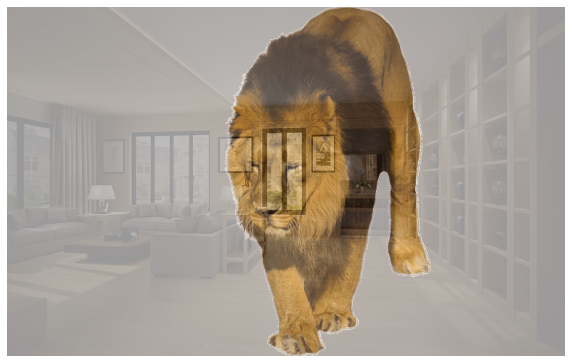

In [261]:
img = Image.new('RGBA', (768, 480), (0, 0, 0, 0))
img.paste(image_lion_PIL, (300, 0))

img3 = Image.blend(image_background_PIL, img, 0.6)

plt.figure(figsize=(10,10))
plt.imshow(img3)
plt.axis('off')
plt.show()